---
title:  "Precision Recall Curve"  
excerpt: "Imbalanced Data"  

categories:  
  - Machine-Learning  
tags:  
  - Measurement  
  - Metric
  - ROC  
  - AUC  
last_modified_at: 2020-06-02T15:00:00-05:00
---

## Reference  
- [Medium Cory Maklin](https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc)

DBSCAN tutorial은 상기 주소를 참조했습니다. 

In [55]:
## create an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [37]:
# numpy float 출력옵션 변경
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.6f}".format(x)})

In [56]:
# plot no skill and model roc curves
def plot_roc_curve(test_y, naive_probs, model_probs,clf_name):
    # plot naive skill roc curve
    fpr, tpr, _ = roc_curve(test_y, naive_probs)
    pyplot.plot(fpr, tpr, linestyle='--', label='No Skill')
    # plot model roc curve
    fpr, tpr, _ = roc_curve(test_y, model_probs)
    pyplot.plot(fpr, tpr, marker='.', label=clf_name)
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

In [39]:
## generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# summarize dataset
print('Dataset: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Train: Class0=%d, Class1=%d' % (len(trainy[trainy==0]), len(trainy[trainy==1])))
print('Test: Class0=%d, Class1=%d' % (len(testy[testy==0]), len(testy[testy==1])))

Dataset: Class0=985, Class1=15
Train: Class0=492, Class1=8
Test: Class0=493, Class1=7


In [40]:
# no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
print(yhat[0:5])
naive_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(testy, naive_probs)
print('No Skill ROC AUC %.3f' % roc_auc)

[[1.000000 0.000000]
 [1.000000 0.000000]
 [1.000000 0.000000]
 [1.000000 0.000000]
 [1.000000 0.000000]]
No Skill ROC AUC 0.490


In [41]:
# skilled model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
print(yhat.shape,'\n',yhat[0:5])

(500, 2) 
 [[0.957972 0.042028]
 [0.998611 0.001389]
 [0.993158 0.006842]
 [0.971323 0.028677]
 [0.999533 0.000467]]


In [43]:
model_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(testy, model_probs)
print('Logistic ROC AUC %.3f' % roc_auc)

Logistic ROC AUC 0.869


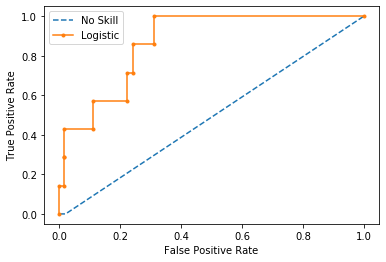

In [44]:
# plot roc curves
plot_roc_curve(testy, naive_probs, model_probs,clf_name='Logistic')

시작에서 보았듯이, 이 data는 1% 만이 positive 한, 심각한 imbalanced data 이다.  
위에는 랜덤분류기와 Logit분류기를 ROC-AUC Curve로 보여줬다.  
이 imbalanced data를 다른 metice으로 평가해보자.  
Precision-Recall Curve ~~ 

In [45]:
# pr curve and pr auc on an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
 
# plot no skill and model precision-recall curves
def plot_pr_curve(test_y, model_probs,clf_name):
    # calculate the no skill line as the proportion of the positive class
    no_skill = len(test_y[test_y==1]) / len(test_y)
    # plot the no skill precision-recall curve
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    # plot model precision-recall curve
    precision, recall, _ = precision_recall_curve(testy, model_probs)
    pyplot.plot(recall, precision, marker='.', label=clf_name)
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
 

In [46]:
# # generate 2 class dataset
# X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)
# # split into train/test sets with same class ratio
# trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# # no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
print(yhat[0:5])
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(testy, naive_probs)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)

[[1.000000 0.000000]
 [1.000000 0.000000]
 [1.000000 0.000000]
 [1.000000 0.000000]
 [1.000000 0.000000]]
No Skill PR AUC: 0.007


In [47]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
print(yhat.shape,'\n',yhat[0:5])
model_probs = yhat[:, 1]

(500, 2) 
 [[0.957972 0.042028]
 [0.998611 0.001389]
 [0.993158 0.006842]
 [0.971323 0.028677]
 [0.999533 0.000467]]


Logistic PR AUC: 0.228


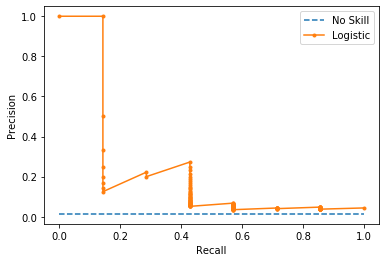

In [48]:
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(testy, model_probs)
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)
# plot precision-recall curves
plot_pr_curve(testy, model_probs,clf_name='Logistic')

No Skill ROC AUC __0.563__ / Logistic ROC AUC __0.869__  

No Skill PR AUC: __0.007__ / Logistic PR AUC: __0.228__  

ROC_AUC 의 값이 전체적으로 후하다는 것을 알 수 있다. 이를 이해하기 위해서는 두 metic이 전달하고자 하는 의미를 이해하는 것이 중요하다.  

**ROC_AUC : 모든 class 에 대한 종합적인 평가**  
**PR AUC : Positive class 에 대한 평가 (즉 minor class)**  

왜냐하면, Precision , Recall 값은 수식을 생각해보면 된다.  
<span style='color:blue'>두 값 모두 TP가 분자이고, 분모는 TP+FP,TP+FN 으로 FN(여기서는 major class)에 대한 의미가 전달되지 않기 때문이다.</span>

실제로 logistic이 도출한 결과를 보면, 대부분의 확률값은 0 으로 예측한다.

In [13]:
from collections import Counter
# predict class labels
yhat = model.predict(testX)
# summarize the distribution of class labels
print(Counter(yhat))

Counter({0: 500})


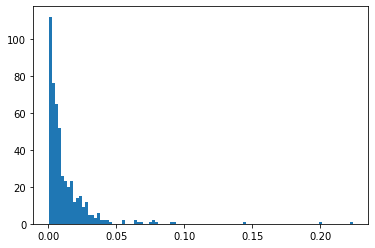

In [17]:
# create a histogram of the predicted probabilities
yhat = model.predict(testX)
pyplot.hist(model_probs, bins=100)
pyplot.show()

## 만약, balance option 을 사용한다면 어떨까?  

상기에서는 from sklearn.linear_model import LogisticRegression 을 사용하였다. 

**일반 Logistic 결과 without class_weight='balanced' option**

In [21]:
## 비교를 위해서, 일반 logistic 모델결과를의 proba값만 0:5 를 보자면, 일단 많이 달라진 것을 알수있다.
## class_weight='balanced' 없이 수행한 일반모델 결과 
yhat = model.predict_proba(testX)
print(yhat.shape,'\n',yhat[0:5])

(500, 2) 
 [[0.957972 0.042028]
 [0.998611 0.001389]
 [0.993158 0.006842]
 [0.971323 0.028677]
 [0.999533 0.000467]]


**Logistic 결과 with class_weight='balanced' option**

In [20]:
# fit a model
model_balance = LogisticRegression(solver='lbfgs',class_weight='balanced')
model_balance.fit(trainX, trainy)
yhat_bal = model_balance.predict_proba(testX)
print(yhat_bal.shape,'\n',yhat_bal[0:5])
model_probs_balance = yhat_bal[:, 1]

(500, 2) 
 [[0.126224 0.873776]
 [0.998063 0.001937]
 [0.855361 0.144639]
 [0.178640 0.821360]
 [0.999452 0.000548]]


1,4 번째 값에 대해 class 1 로 분류가 바뀌었다.

In [22]:
# calculate roc auc
roc_auc = roc_auc_score(testy, model_probs_balance)
print('Logistic With class_weight option! ROC AUC %.3f' % roc_auc)

Logistic With class_weight option! ROC AUC 0.865


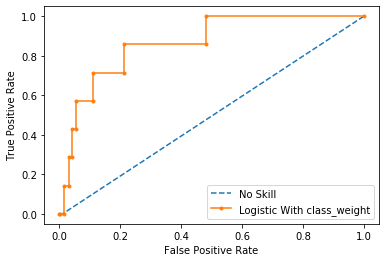

In [50]:
# plot roc curves
plot_roc_curve(testy, naive_probs, model_probs_balance,clf_name='Logistic With class_weight')

일단, <span style='color:blue'>**0.869 -> 0.865**</span> 로 다소 감소했다.

Logistic With class_weight PR AUC: 0.075


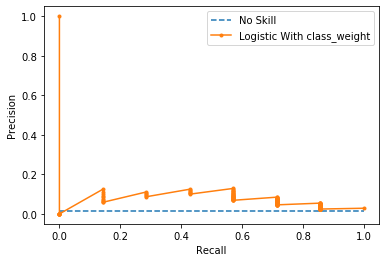

In [51]:
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(testy, model_probs_balance)
auc_score = auc(recall, precision)
print('Logistic With class_weight PR AUC: %.3f' % auc_score)
# plot precision-recall curves
plot_pr_curve(testy, model_probs_balance,clf_name='Logistic With class_weight')

<span style='color:blue'>**0.228 -> 0.075**</span> 로 감소했다.

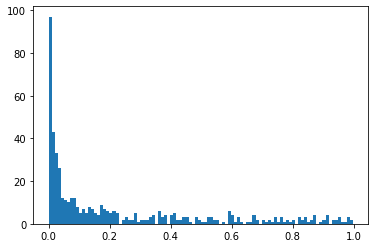

In [25]:
# create a histogram of the predicted probabilities
pyplot.hist(model_probs_balance, bins=100)
pyplot.show()

balance 옵션을 사용한 분류기는 without balance 분류기와 비교했을때, 확실히, 다양한 확률값을 보여준다. 물론 0으로 예측하는 것이 많지만, 나아진것은 사실이다.  
또한, ROC-AUC 든, PR-AUC 든 값이 낮아지며 특히 PR-AUC 값이 많이 낮아진다.  

**Balance option doc**  
- class_weightdict or ‘balanced’, default=None
- Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
- The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

- Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

In [31]:
print(len(testy))
print(np.bincount(testy))

500
[493   7]


In [28]:
n_classes = 2
len(testy)/(n_classes*np.bincount(testy))

array([0.507099, 35.714286])

## 정확한 비교를 위해, 다른 분류기를 사용해보자.  
sklearn.ensemble.RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf_clf = RandomForestClassifier(max_depth=4, random_state=0,max_features='auto')
rf_clf_balance = RandomForestClassifier(max_depth=4, random_state=0,max_features='auto',class_weight='balanced')

In [52]:
rf_clf.fit(trainX, trainy)
rf_yhat = rf_clf.predict_proba(testX)
print(rf_yhat.shape,'\n',rf_yhat[0:5])
rf_yhat_pros = rf_yhat[:, 1]

rf_clf_balance.fit(trainX, trainy)
rf_yhat_balance = rf_clf_balance.predict_proba(testX)
print(rf_yhat_balance.shape,'\n',rf_yhat_balance[0:5])
rf_yhat_bal_pros = rf_yhat_balance[:, 1]

(500, 2) 
 [[0.973005 0.026995]
 [0.993865 0.006135]
 [0.998253 0.001747]
 [0.983092 0.016908]
 [0.998115 0.001885]]
(500, 2) 
 [[0.820413 0.179587]
 [0.937295 0.062705]
 [0.980182 0.019818]
 [0.820003 0.179997]
 [0.982377 0.017623]]


In [53]:
# calculate roc auc
roc_auc_rf = roc_auc_score(testy, rf_yhat_pros)
print('RF Without class_weight option! ROC AUC %.3f' % roc_auc_rf)

roc_auc02_rf_bal = roc_auc_score(testy, rf_yhat_bal_pros)
print('RF With class_weight option! ROC AUC %.3f' % roc_auc02_rf_bal)

RF Without class_weight option! ROC AUC 0.804
RF With class_weight option! ROC AUC 0.767


In [104]:
# fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 8))
# axes[0]
# # axes[0]= plot_roc_curve(testy, naive_probs, rf_yhat_bal_pros,clf_name='RF With class_weight')
# # axes[1]= plot_roc_curve(testy, naive_probs, rf_yhat_bal_pros,clf_name='RF Without class_weight')
# # plot_roc_curve(testy, naive_probs, rf_yhat_bal_pros,clf_name='RF With class_weight')

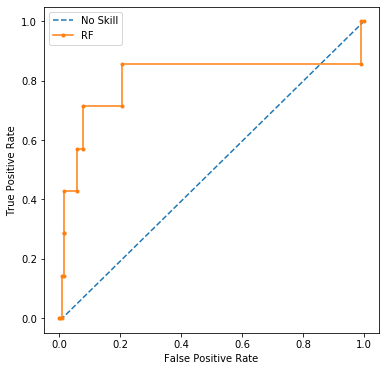

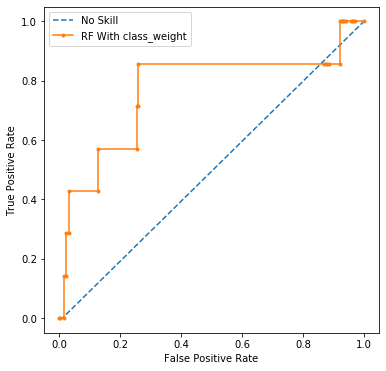

In [108]:
# plot roc curves
plt.figure(figsize=(6,6))
plot_roc_curve(testy, naive_probs, rf_yhat_pros,clf_name='RF')

plt.figure(figsize=(6,6))
plot_roc_curve(testy, naive_probs, rf_yhat_bal_pros,clf_name='RF With class_weight')

일단, <span style='color:blue'>**0.804 -> 0.767**</span> 로 다소 감소했다.

In [106]:
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(testy, rf_yhat_pros)
auc_score = auc(recall, precision)
print('RF PR AUC: %.3f' % auc_score)

precision, recall, _ = precision_recall_curve(testy, rf_yhat_bal_pros)
auc_score = auc(recall, precision)
print('RF With class-weight PR AUC: %.3f' % auc_score)

RF PR AUC: 0.113
RF With class-weight PR AUC: 0.065


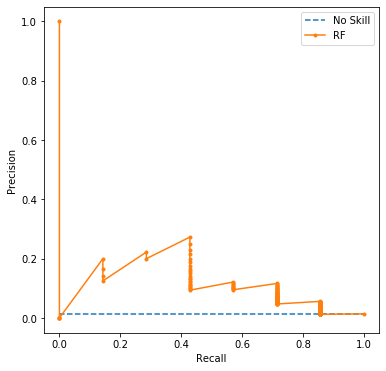

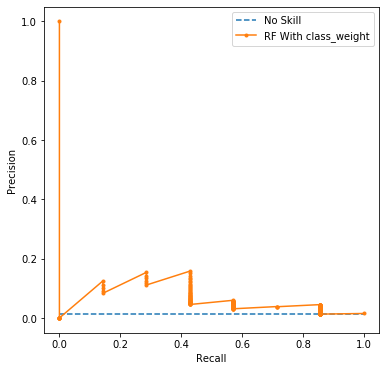

In [111]:
# plot precision-recall curves
# plot roc curves
plt.figure(figsize=(6,6))
plot_pr_curve(testy, rf_yhat_pros,clf_name='RF')

plt.figure(figsize=(6,6))
plot_pr_curve(testy, rf_yhat_bal_pros,clf_name='RF With class_weight')

<span style='color:blue'>**0.113 -> 0.065**</span> 로 다소 감소했다.

|Type     |Logit     | Logit Bal|RF        | RF Bal |
|:--------|:--------:|:--------:|:--------:|:--------:|
| ROC-AUC |0.869  |0.865 | 0.804 | 0.767|
| PR-AUC |0.228  |  0.075 | 0.113 | 0.065|

class_weight 옵션은 같은 모델에서는 값을 더 엄격히 낮아지게 하는데, 다른 모델간 비교에서는 큰 변화를 이끌어내지 못한다.  
즉, "A 모델 성능 > B 모델성능" 이었는데, class_weight을 사용한다고 해서, "A 모델 성능 < B 모델성능" 으로 바뀌지는 않는다.